In [1]:
library('tidymodels')
library('tidyverse')

theme_set(theme_gray(base_size = 16))

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.2.0
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖

In [2]:
mtcars |> head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


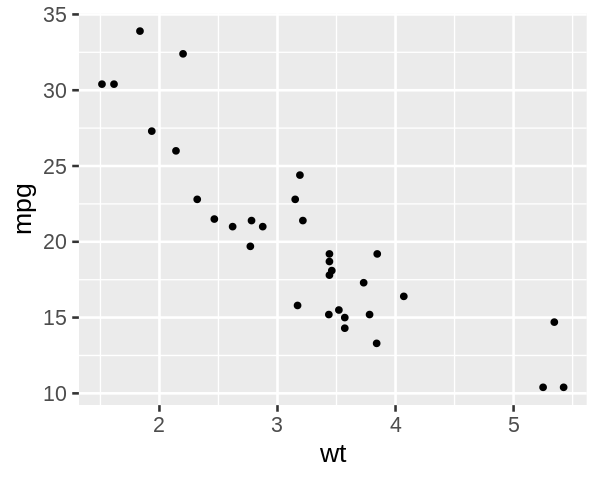

In [3]:
options(repr.plot.height = 4, repr.plot.width = 5)

ggplot(mtcars, aes(x = wt, y = mpg)) +
    geom_point()

In [6]:
mtcars |> head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Quadratic fit

In [13]:
rec = recipe(mpg ~ wt, data = mtcars) |>
    step_poly(wt, degree = 2, options = list(raw = TRUE)) |>
    prep()

rec |> juice() |> head()

mpg,wt_poly_1,wt_poly_2
<dbl>,<dbl>,<dbl>
21.0,2.620,6.864400
21.0,2.875,8.265625
22.8,2.320,5.382400
21.4,3.215,10.336225
18.7,3.440,11.833600
18.1,3.460,11.971600


In [7]:
mod = linear_reg() |> set_engine('lm')

In [8]:
wf = workflow() |>
    add_recipe(rec) |>
    add_model(mod)

wf_fit = wf |> fit(data = mtcars)

In [9]:
mtcars_with_pred = augment(wf_fit, new_data = mtcars)

mtcars_with_pred |> head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,22.91314
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,21.14211
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,25.19169
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,19.01764
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,17.76063
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,17.65463


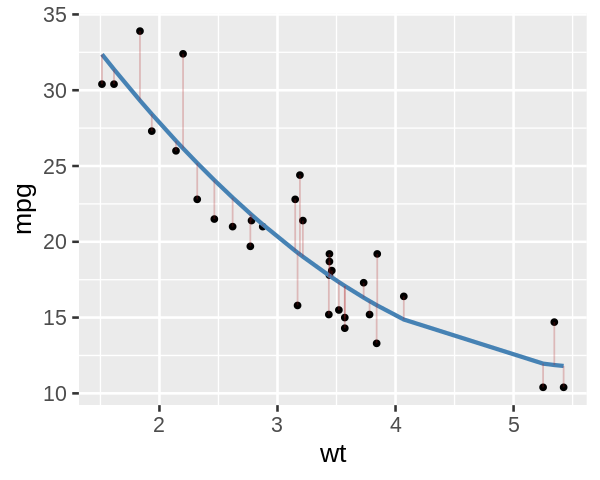

In [10]:
ggplot(mtcars_with_pred) +
    geom_point(aes(x = wt, y = mpg)) + 
    geom_line(aes(x = wt, y = .pred), color = 'steelblue', linewidth = 1.2) +
    geom_segment(aes(x = wt, xend = wt, y = .pred, yend = mpg), 
                 color = 'firebrick',
                 alpha = 0.25)

In [14]:
wf_fit |> predict(new_data = data.frame(wt = c(10)))

.pred
<dbl>
33.23613


## Natural splines

In [15]:
rec = recipe(mpg ~ wt, data = mtcars) |>
    step_ns(wt, deg_free = 3) |>
    prep()

mod = linear_reg() |> set_engine('lm')

wf = workflow() |>
    add_recipe(rec) |>
    add_model(mod)

wf_fit = fit(wf, data = mtcars)

mtcars_with_pred = augment(wf_fit, new_data = mtcars)
mtcars_with_pred |> head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,22.88770
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,21.06048
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,25.25212
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,18.92988
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,17.71275
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,17.61195


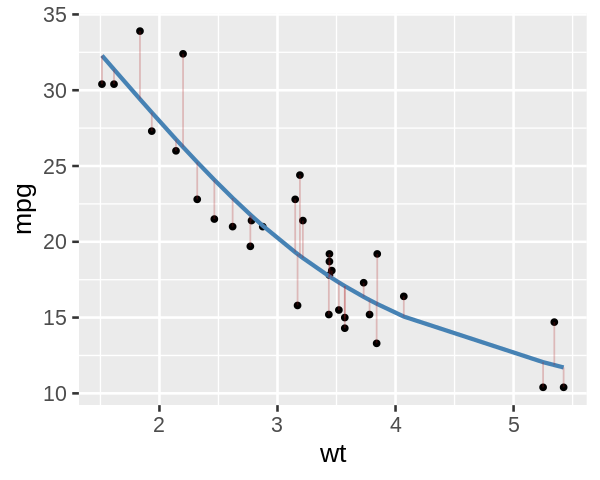

In [16]:
ggplot(mtcars_with_pred) +
    geom_point(aes(x = wt, y = mpg)) + 
    geom_line(aes(x = wt, y = .pred), color = 'steelblue', linewidth = 1.2) +
    geom_segment(aes(x = wt, xend = wt, y = .pred, yend = mpg), 
                 color = 'firebrick',
                 alpha = 0.25)

In [17]:
wf_fit |> predict(new_data = data.frame(wt = c(10)))

.pred
<dbl>
2.54768
